## 1. importing necessary libraries

In [ ]:

import os
import math
import re
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import(
    OneHotEncoder,
    LabelEncoder,
    StandardScaler,
    MinMaxScaler
)

from sklearn.metrics import(
    r2_score,
    accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    mean_absolute_percentage_error,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    recall_score
)

from sklearn.linear_model import(
    LinearRegression,
    LogisticRegression,
    Lasso,
    Ridge,
    ElasticNet
)

from sklearn.tree import(
    DecisionTreeClassifier,
    DecisionTreeRegressor
)

from sklearn.ensemble import(
    RandomForestClassifier,
    RandomForestRegressor
)

from sklearn.model_selection import(
    train_test_split
)

from sklearn.naive_bayes import(
    GaussianNB
)

from sklearn.svm import(
    SVC,
    SVR
)

## 2. Data Loading

In [6]:
path = os.path.join('Data_Sets','students_data.csv')
df = pd.read_csv(path)

## 3. Basic Inspection

In [7]:
df.head()

,sex,age,address,FamilySize,ParentStatus,MotherEducation,FatherEducation,MotherJob,FatherJob,reason,...,FamilyRelation,freetime,Hangout,DailyAlcoholConsumption,WeekendAlcoholConsumption,health,absences,finalmarks,final_marks_in_percentage,finalgrades
0,F,18.0,Urban,Greater_Than_3,Apart,higher_education,higher_education,at_home,teacher,course,...,very_good,medium,high,very_low,very_low,good,6.0,6,30.0,1.2
1,F,17.0,Urban,Greater_Than_3,Together,primary_education,primary_education,at_home,other,course,...,excellent,medium,medium,very_low,very_low,good,NaN,6,30.0,1.2
2,F,15.0,Urban,Less_Equal_3,Together,primary_education,primary_education,at_home,other,other,...,very_good,medium,low,low,medium,good,10.0,10,50.0,2.0
3,F,15.0,NaN,Greater_Than_3,Together,higher_education,lower_secondary,health,services,home,...,good,low,low,very_low,very_low,excellent,2.0,15,75.0,3.0
4,F,16.0,Urban,Greater_Than_3,Together,secondary_education,secondary_education,other,other,home,...,very_good,medium,low,very_low,low,excellent,NaN,10,50.0,2.0


### Handliong Missing values

In [10]:
df.isnull().sum()

sex                          0
age                          3
address                      2
FamilySize                   0
ParentStatus                 0
MotherEducation              0
FatherEducation              0
MotherJob                    0
FatherJob                    0
reason                       0
guardian                     0
traveltime_in_min            0
studytime_in_hrs             0
no_of_failures               0
SchoolSupport                0
FamilySupport                0
ExtraPaidClasses             0
activities                   0
nursery                      0
higher                       0
internet                     0
romantic                     0
FamilyRelation               0
freetime                     0
Hangout                      0
DailyAlcoholConsumption      0
WeekendAlcoholConsumption    0
health                       0
absences                     3
finalmarks                   0
final_marks_in_percentage    0
finalgrades                  0
dtype: i

In [11]:
df.isnull().sum()>0

sex                          False
age                           True
address                       True
FamilySize                   False
ParentStatus                 False
MotherEducation              False
FatherEducation              False
MotherJob                    False
FatherJob                    False
reason                       False
guardian                     False
traveltime_in_min            False
studytime_in_hrs             False
no_of_failures               False
SchoolSupport                False
FamilySupport                False
ExtraPaidClasses             False
activities                   False
nursery                      False
higher                       False
internet                     False
romantic                     False
FamilyRelation               False
freetime                     False
Hangout                      False
DailyAlcoholConsumption      False
WeekendAlcoholConsumption    False
health                       False
absences            

In [13]:
missing_info={}
for col in df.columns:
    if df[col].isnull().sum()>0:
        missing_count=((df[col].isnull().sum())/len(df))*100
        missing_info[col]=round(missing_count,2)
print("The colums with their missing values are:")

for col,perc in missing_info.items():
    print(f'{col}:{perc}%')

The colums with their missing values are:
age:0.76%
address:0.51%
absences:0.76%


In [14]:
numerical_columns= df.select_dtypes(include=['number']).columns
df[numerical_columns].head()

,age,no_of_failures,absences,finalmarks,final_marks_in_percentage,finalgrades
0,18.0,0,6.0,6,30.0,1.2
1,17.0,0,NaN,6,30.0,1.2
2,15.0,3,10.0,10,50.0,2.0
3,15.0,0,2.0,15,75.0,3.0
4,16.0,0,NaN,10,50.0,2.0


### Box Plot for the Missing columns

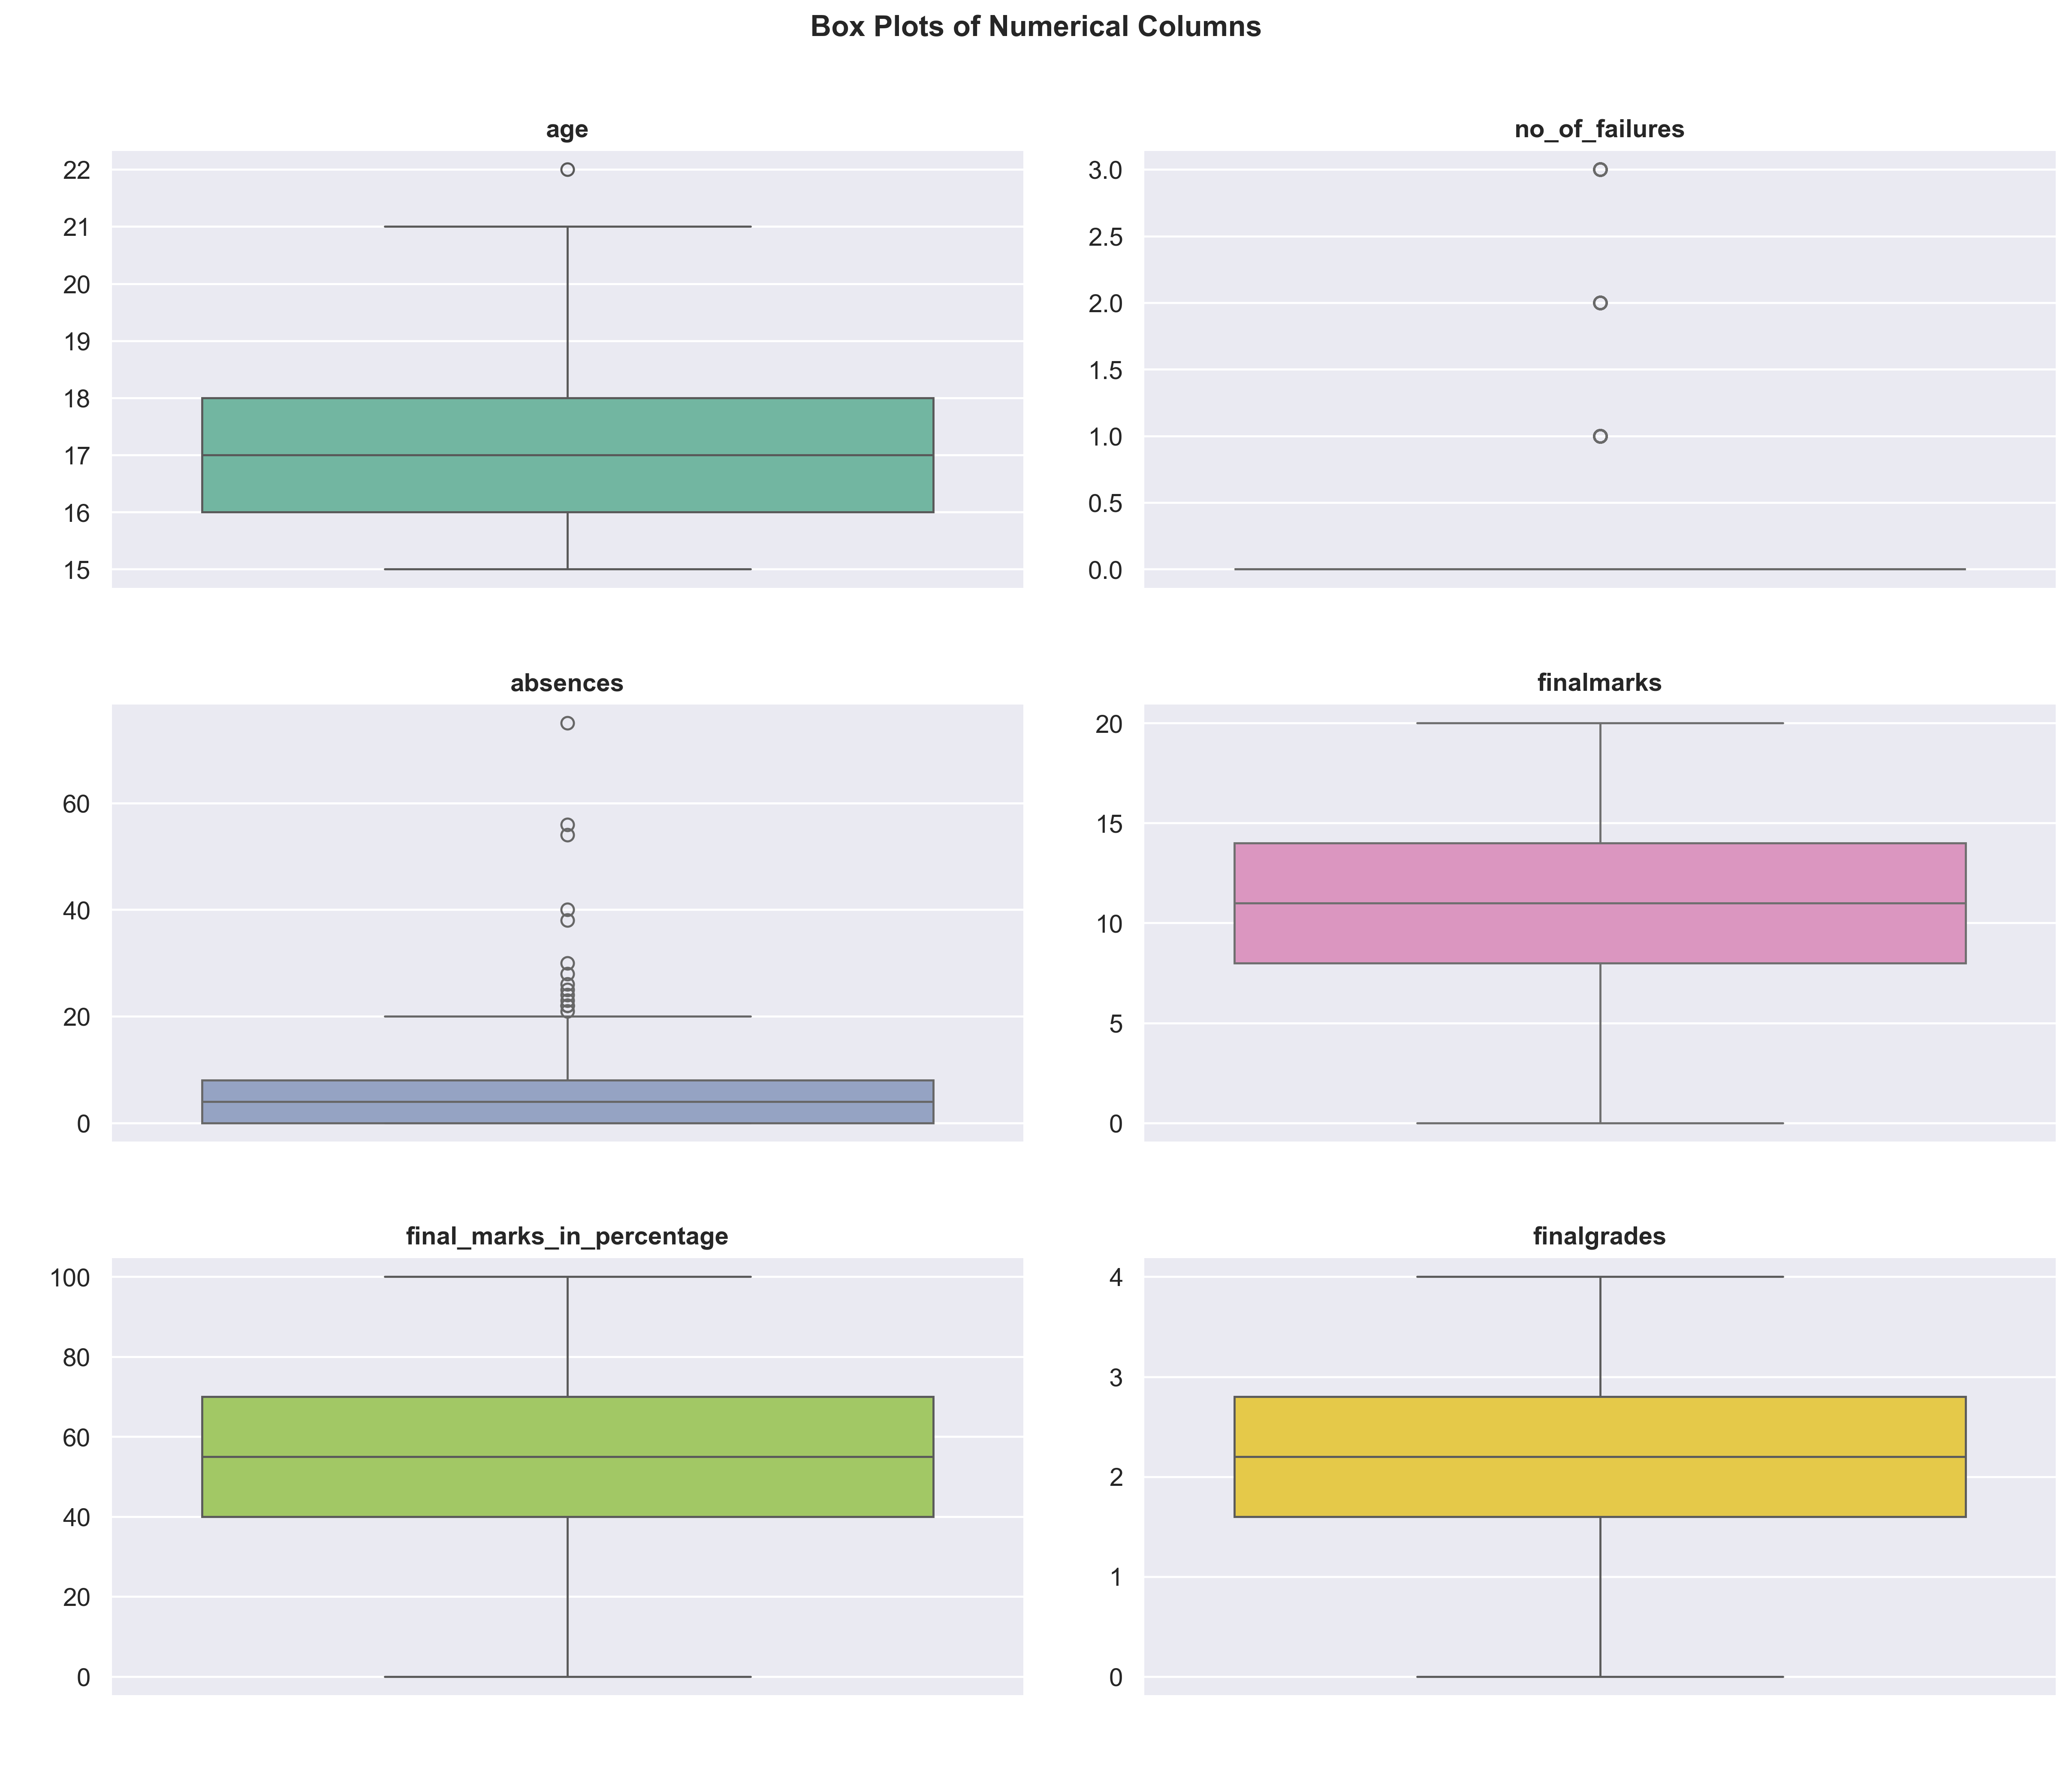

In [16]:
sns.set(style='darkgrid',palette='hls',font_scale=1.1)

fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(14,12),dpi=350)
axes=axes.flatten()
colors=sns.color_palette("Set2",n_colors=len(numerical_columns))

for idx,column in enumerate(numerical_columns):
    sns.boxplot(
        y=df[column],
        ax=axes[idx],
        color=colors[idx]
    )
    axes[idx].set_title(column,fontsize=12,fontweight='bold')
    axes[idx].set_xlabel(" ")
    axes[idx].set_ylabel(" ")

    for idx in range(len(numerical_columns),len(axes)):
        fig.delaxes(axes[idx])

plt.suptitle(
    "Box Plots of Numerical Columns",
    fontsize=14,
    fontweight='bold'
)

plt.tight_layout(rect=[0,0,1,0.97])
plt.show()


In [17]:
df[numerical_columns]=df[numerical_columns].fillna(df[numerical_columns].median())

### Filling the categorical colums

In [18]:
categorical_columns = df.select_dtypes(['number']).columns

df[categorical_columns]=df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [19]:
df.isna().sum()

sex                          0
age                          0
address                      2
FamilySize                   0
ParentStatus                 0
MotherEducation              0
FatherEducation              0
MotherJob                    0
FatherJob                    0
reason                       0
guardian                     0
traveltime_in_min            0
studytime_in_hrs             0
no_of_failures               0
SchoolSupport                0
FamilySupport                0
ExtraPaidClasses             0
activities                   0
nursery                      0
higher                       0
internet                     0
romantic                     0
FamilyRelation               0
freetime                     0
Hangout                      0
DailyAlcoholConsumption      0
WeekendAlcoholConsumption    0
health                       0
absences                     0
finalmarks                   0
final_marks_in_percentage    0
finalgrades                  0
dtype: i

### Pie Chart for Categorical Data

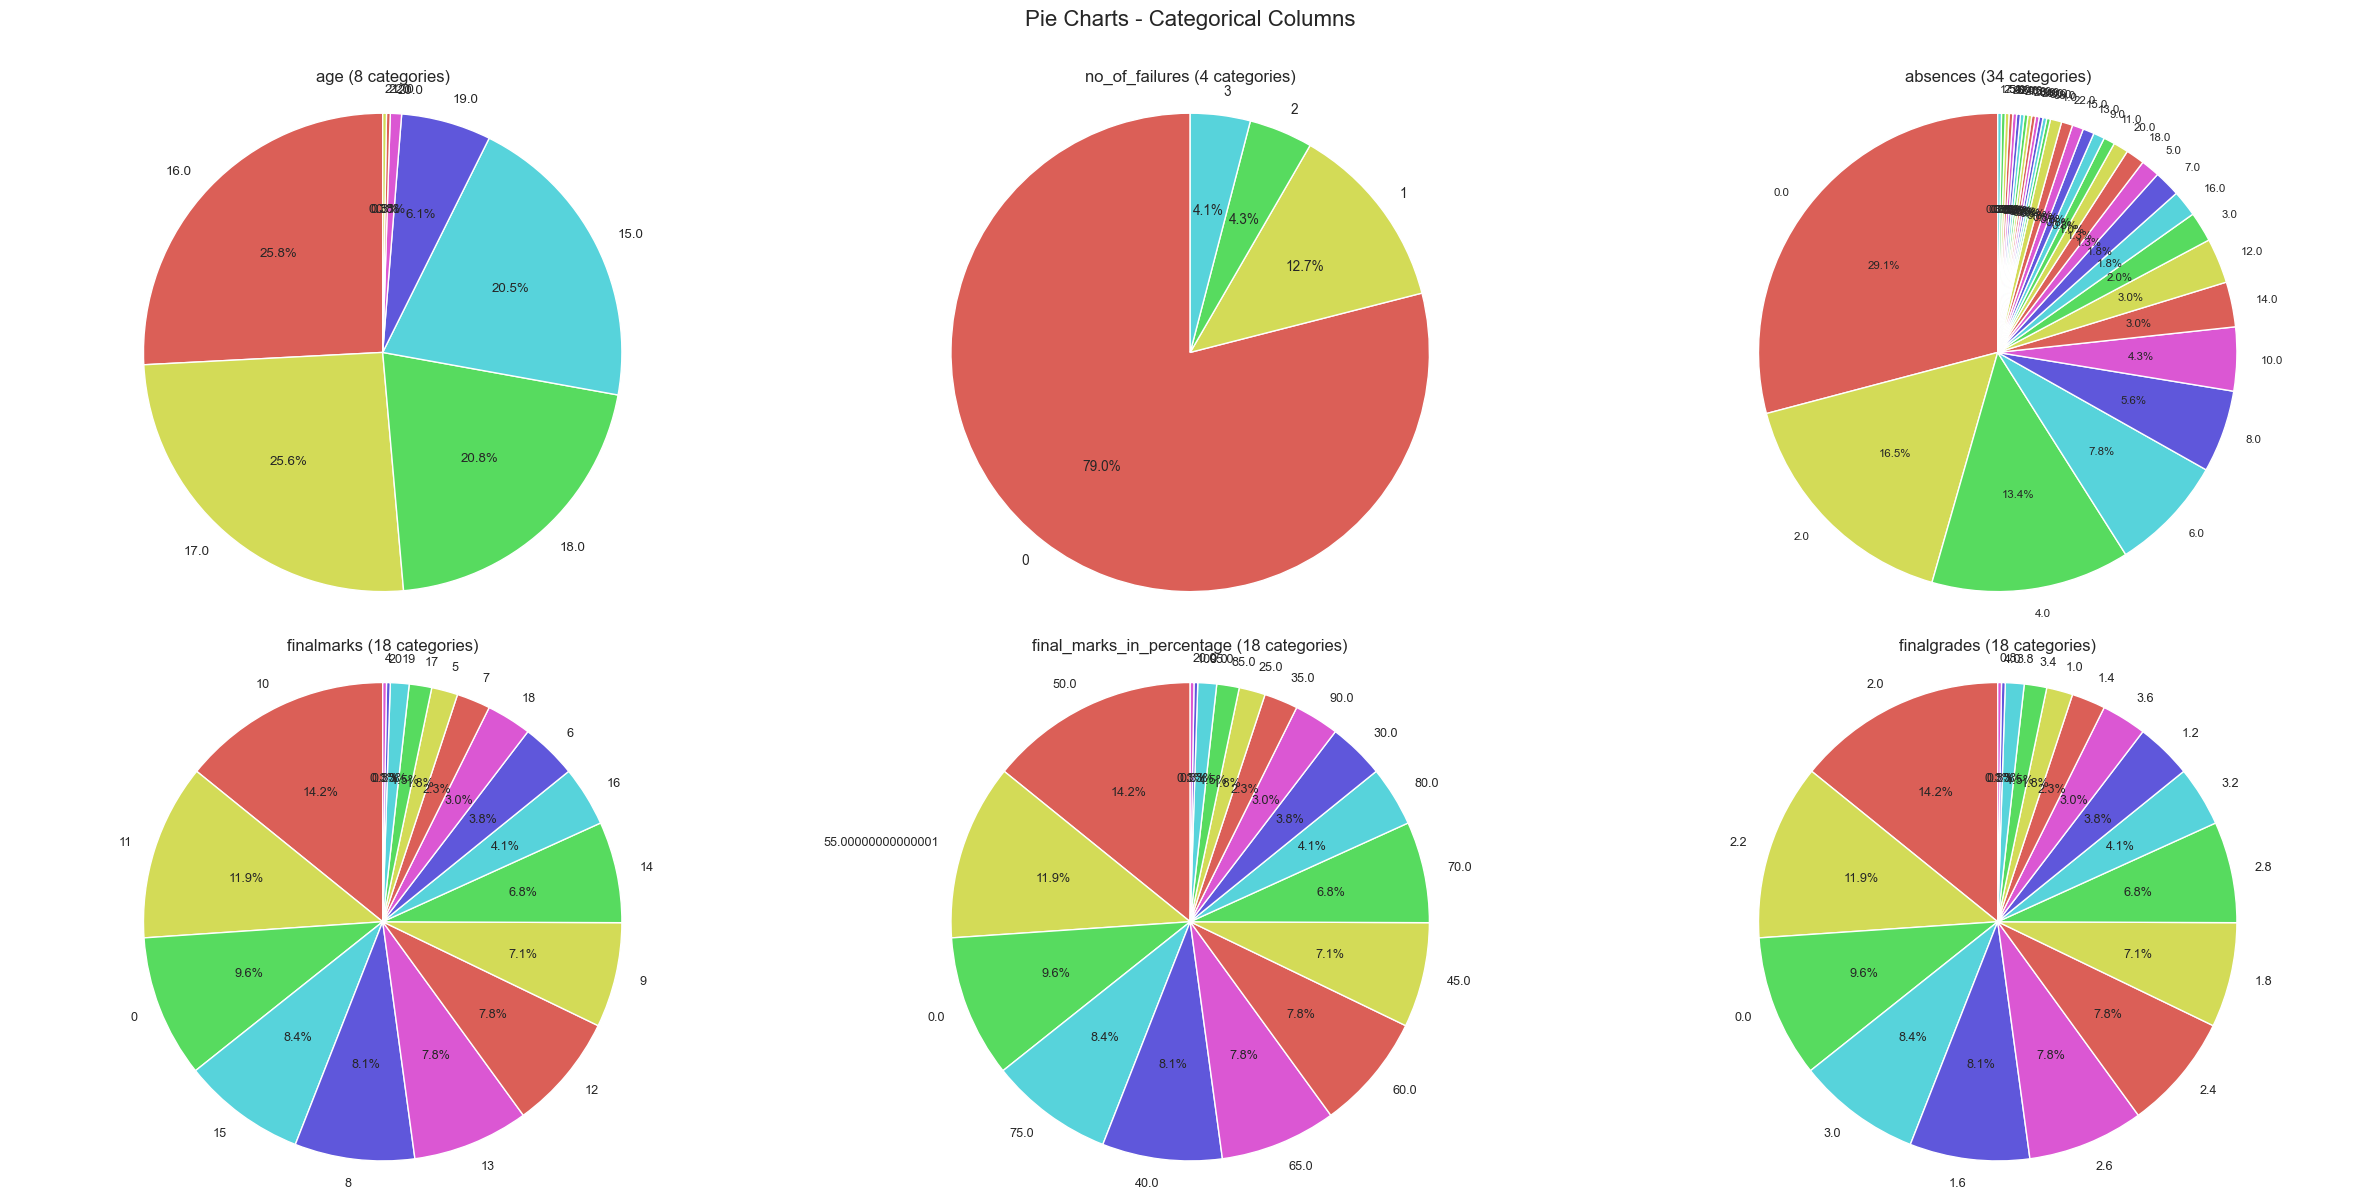

In [21]:
if len(categorical_columns) > 0:
    n_cols = min(3, len(categorical_columns))
    n_rows = (len(categorical_columns) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 6*n_rows))
    if len(categorical_columns) == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if n_rows > 1 else axes
    
    for idx, col in enumerate(categorical_columns):
        value_counts = df[col].value_counts()
        font_size = max(6, 10 - len(value_counts) * 0.05)
        
        axes[idx].pie(value_counts.values, labels=value_counts.index, 
                     autopct='%1.1f%%', startangle=90, 
                     textprops={'fontsize': font_size})
        axes[idx].set_title(f'{col} ({len(value_counts)} categories)', fontsize=12)
        axes[idx].axis('equal')
    
    # Hide empty subplots
    for idx in range(len(categorical_columns), len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Pie Charts - Categorical Columns', fontsize=16, y=1.00)
    plt.tight_layout()
    plt.show()

### Pie Chart for Numerical Data

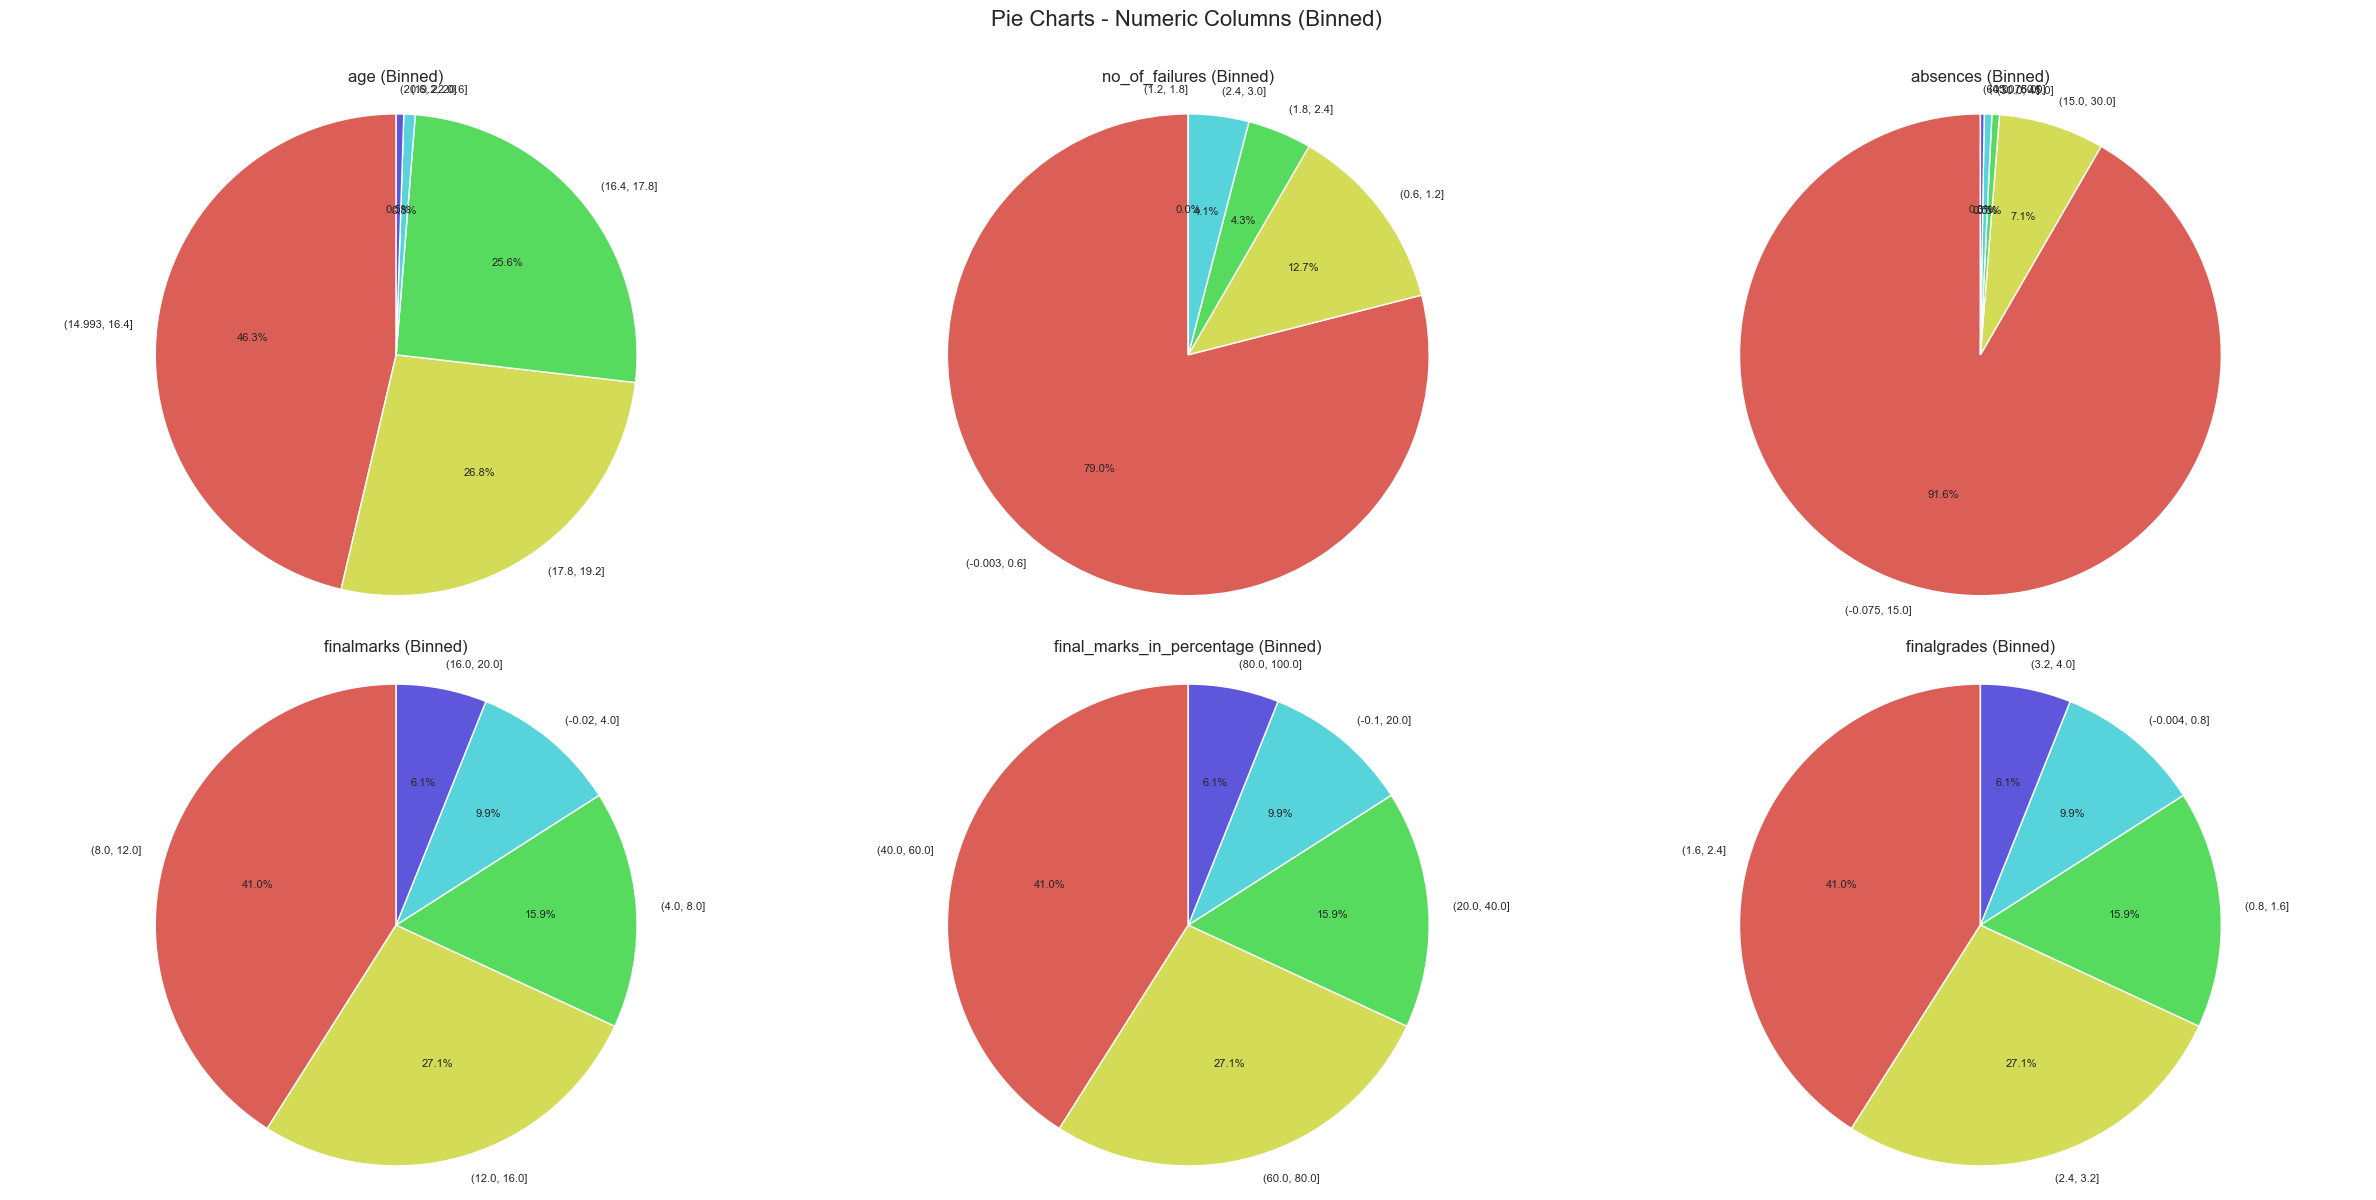

In [22]:
if len(numerical_columns) > 0:
    n_cols = min(3, len(numerical_columns))
    n_rows = (len(numerical_columns) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 6*n_rows))
    if len(numerical_columns) == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if n_rows > 1 else axes
    
    for idx, col in enumerate(numerical_columns):
        binned_data = pd.cut(df[col], bins=5)
        value_counts = binned_data.value_counts()
        
        axes[idx].pie(value_counts.values, labels=value_counts.index, 
                     autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
        axes[idx].set_title(f'{col} (Binned)', fontsize=12)
        axes[idx].axis('equal')
    
    # Hide empty subplots
    for idx in range(len(numerical_columns), len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Pie Charts - Numeric Columns (Binned)', fontsize=16, y=1.00)
    plt.tight_layout()
    plt.show()


### Hexbin Plot

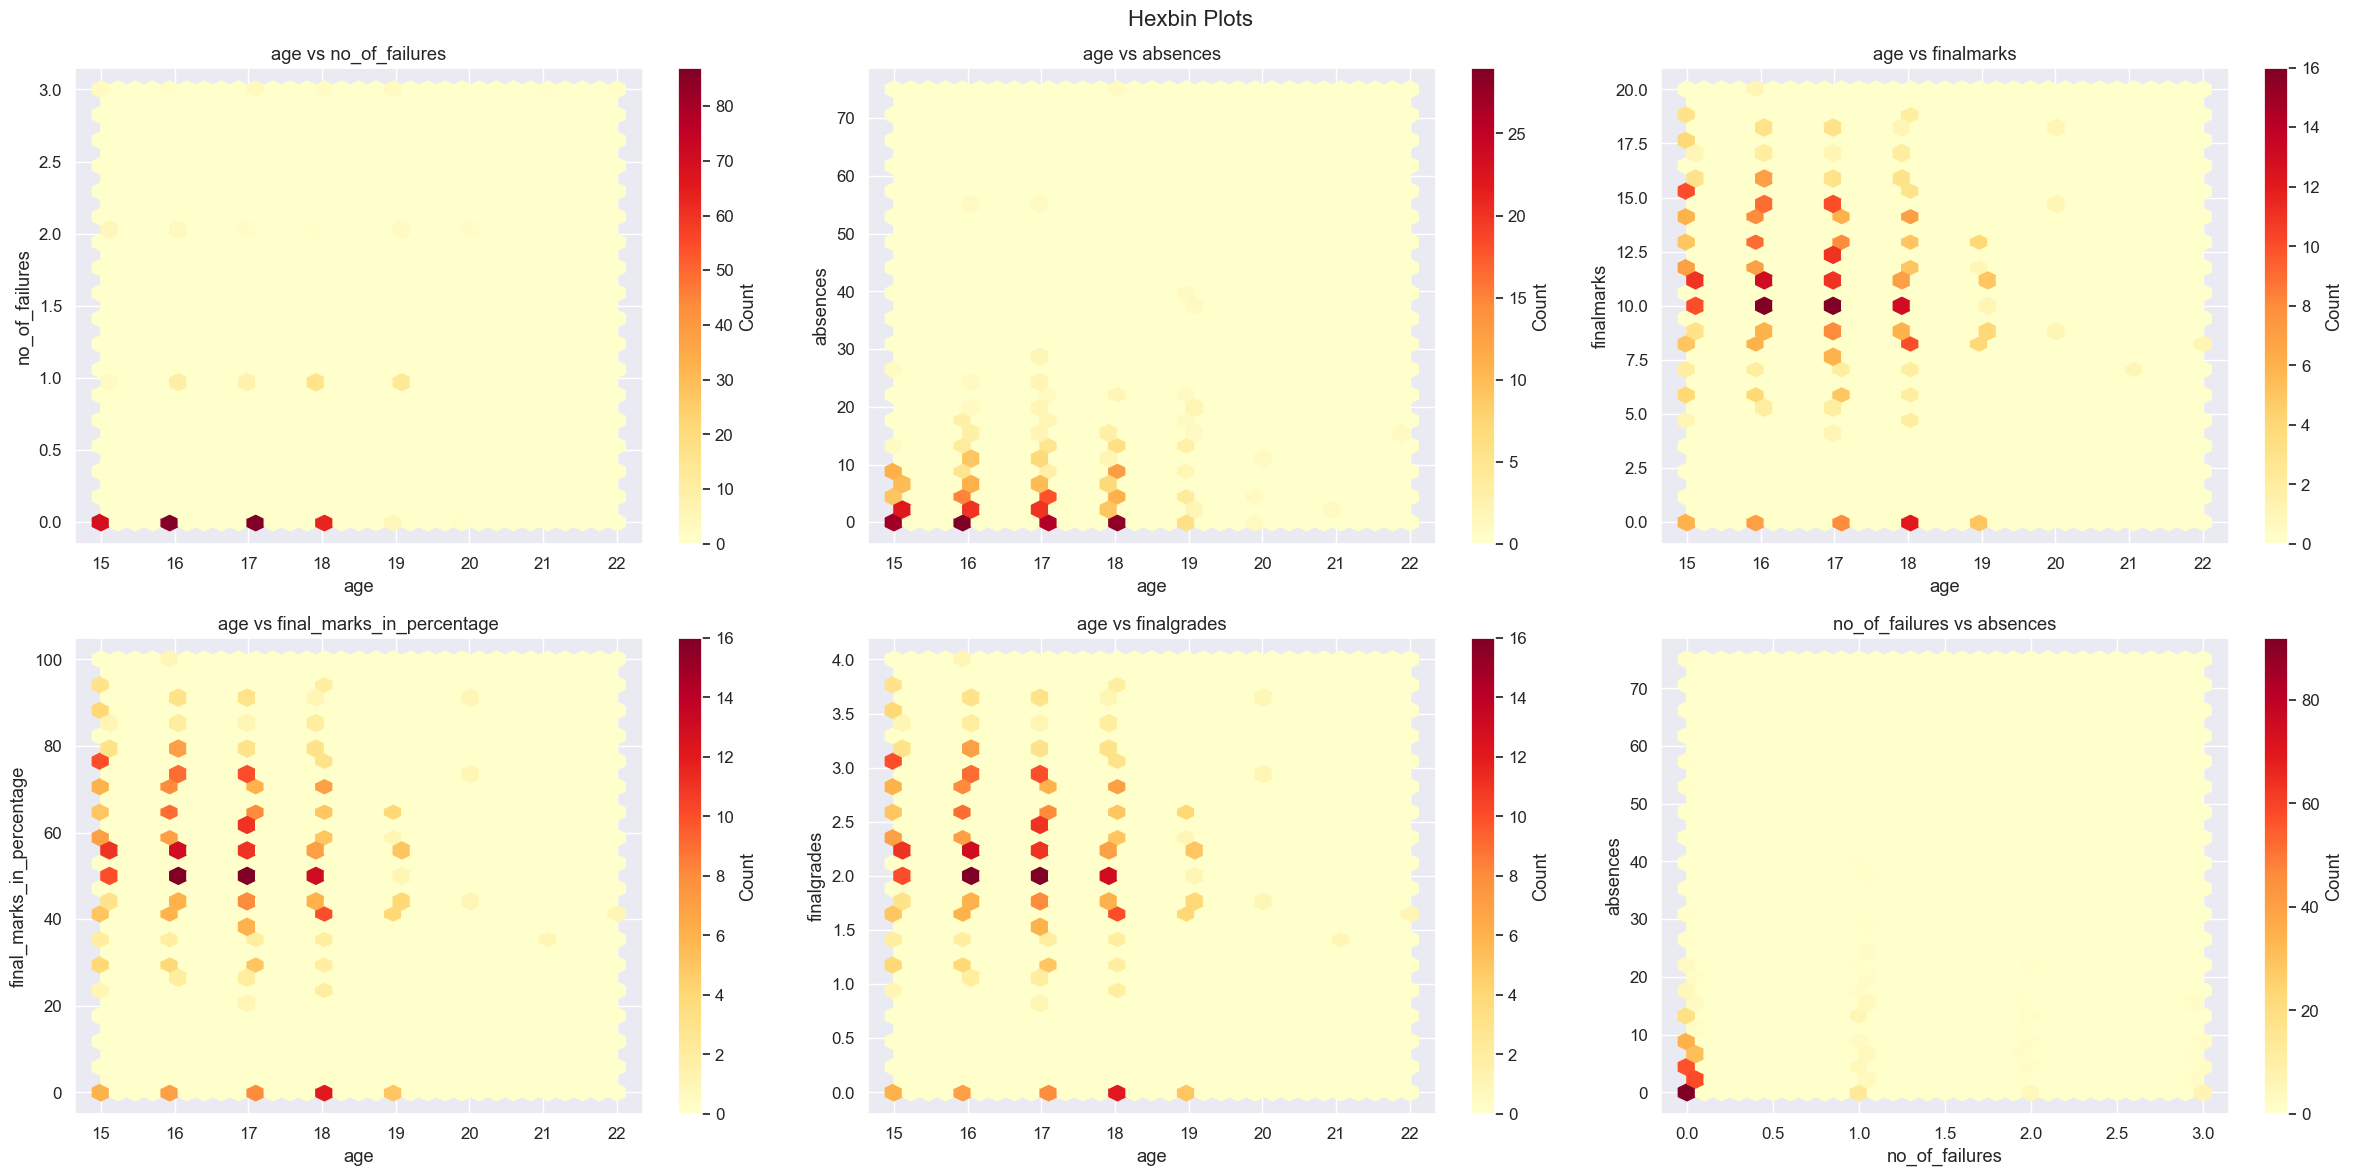

In [23]:
if len(numerical_columns) >= 2:
    # Create hexbin for multiple pairs
    n_plots = min(6, len(numerical_columns) * (len(numerical_columns) - 1) // 2)
    n_cols = 3
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 6*n_rows))
    axes = axes.flatten() if n_plots > 1 else [axes]
    
    plot_idx = 0
    for i in range(len(numerical_columns)):
        for j in range(i+1, len(numerical_columns)):
            if plot_idx >= n_plots:
                break
            
            hb = axes[plot_idx].hexbin(df[numerical_columns[i]], df[numerical_columns[j]], 
                                       gridsize=30, cmap='YlOrRd')
            axes[plot_idx].set_xlabel(numerical_columns[i])
            axes[plot_idx].set_ylabel(numerical_columns[j])
            axes[plot_idx].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
            plt.colorbar(hb, ax=axes[plot_idx], label='Count')
            plot_idx += 1
        if plot_idx >= n_plots:
            break
    
    # Hide empty subplots
    for idx in range(plot_idx, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Hexbin Plots', fontsize=16)
    plt.tight_layout()
    plt.show()
